In [3]:
!pip uninstall numpy pandas -y
!pip install numpy
!pip install pandas

Found existing installation: numpy 2.3.2
Uninstalling numpy-2.3.2:
  Successfully uninstalled numpy-2.3.2
Found existing installation: pandas 2.3.1
Uninstalling pandas-2.3.1:
  Successfully uninstalled pandas-2.3.1
  Using cached numpy-2.3.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.3.2-cp313-cp313-win_amd64.whl (12.8 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bokeh 3.6.2 requires pandas>=1.2, which is not installed.
datashader 0.18.0 requires pandas, which is not installed.
holoviews 1.20.2 requires pandas>=1.3, which is not installed.
hvplot 0.11.3 requires pandas>=1.3, which is not installed.
panel 1.7.0 requires pandas>=1.2, which is not installed.
seaborn 0.13.2 requires pandas>=1.2, which is not installed.
statsmodels 0.14.4 requires pandas!=2.1.0,>=1.4, which is not installed.
streamlit 1.45.1 requires pandas<3,>=1.4.0, which is not installed.
xarray 2025.4.0 requires pandas>=2.1, which is not installed.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.3.2 which is incompatible.


  Using cached pandas-2.3.1-cp313-cp313-win_amd64.whl.metadata (19 kB)
Using cached pandas-2.3.1-cp313-cp313-win_amd64.whl (11.0 MB)


In [4]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install nltk
!pip install textblob
!pip install wordcloud

  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
Using cached textblob-0.19.0-py3-none-any.whl (624 kB)


In [5]:
!pip install tensorflow

  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.11.2-py3-none-any.whl.metadata (5.9 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 3.1/332.0 MB 17.9 MB/s eta 0:00:19
    ---------------

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Basic libraries imported successfully!")

plt.style.use('default')
%matplotlib inline

Basic libraries imported successfully!


In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

print("Scikit-learn libraries imported successfully!")

Scikit-learn libraries imported successfully!


In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')

print("NLP libraries imported successfully!")

NLP libraries imported successfully!


In [9]:
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('omw-1.4', quiet=True)

print("NLTK data downloaded successfully!")

NLTK data downloaded successfully!


In [16]:
csv_path = r"D:\ml\reviews.csv"
date_cols = ["at", "repliedAt"]
df = pd.read_csv(csv_path, parse_dates=date_cols, low_memory=False)

print("Loaded shape:", df.shape)
df.head(3)


Loaded shape: (12495, 12)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaT,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaT,newest,com.anydo


In [17]:
expected = {'reviewId','userName','userImage','content','score','thumbsUpCount',
            'reviewCreatedVersion','at','replyContent','repliedAt','sortOrder','appId'}
print("All columns present:", expected.issubset(df.columns))

df = df.dropna(subset=["content","score"])
df["score"] = pd.to_numeric(df["score"], errors="coerce")
df = df.dropna(subset=["score"])
df["score"] = df["score"].astype(int)

df["content"] = df["content"].astype(str).str.strip()

print("After cleaning:", df.shape)
df.sample(5)


All columns present: True
After cleaning: (12495, 12)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
1133,gp:AOqpTOGPUYN33wdtoloTq2w5SJPg-eGUKJO1-nW5uDD...,Norbert Purger,https://play-lh.googleusercontent.com/a-/AOh14...,Rescheduling tasks is simply randomly not work...,1,9,15.4.0,2020-03-30 13:42:27,"Hi Norbert, sorry for the trouble :( Please co...",2020-04-07 11:57:29,newest,com.todoist
10208,gp:AOqpTOGT-80Bgox7O-eVCuoJ16PZ0jRLvdxBXeAJhpf...,Jim B,https://play-lh.googleusercontent.com/a-/AOh14...,Does almost everything i need. I have tasks th...,4,0,2.9.1,2020-10-20 22:57:44,"Hi Jim, this is not currently possible. Howeve...",2020-10-20 23:57:45,newest,com.tasks.android
8984,gp:AOqpTOG6JltHrCdTZKuO5y_yx1CCbR0HQ1mYG01zQhE...,Oksana Kryvenko,https://play-lh.googleusercontent.com/-BpCrbD6...,The application cleaned up all information I w...,2,0,2.2.1,2017-07-19 19:41:49,This is not true. The application doesn't have...,2017-07-19 19:46:49,newest,com.gmail.jmartindev.timetune
1394,gp:AOqpTOHyXRfeEnSO8kJSe4WVuU7ZPg03zfkn33WCzaS...,Bob MacMahon,https://play-lh.googleusercontent.com/-992aFNX...,"Clean, simple interface.",3,0,15.7.2,2020-06-14 17:03:24,NaN,NaT,newest,com.todoist
1618,gp:AOqpTOE7iXj0qtykQrCuoP5H0Ero6Q5fPmkGE0vC_9H...,Carson Bell,https://play-lh.googleusercontent.com/a-/AOh14...,Always a good thing! Great! Wonderful!,4,0,15.8.0,2020-07-16 12:04:34,NaN,NaT,newest,com.todoist


In [18]:
def score_to_sentiment(s):
    if s >= 4: return "positive"
    if s <= 2: return "negative"
    return "neutral"

df["sentiment"] = df["score"].apply(score_to_sentiment)
df["sentiment"].value_counts()


sentiment
positive    5654
negative    4850
neutral     1991
Name: count, dtype: int64

In [19]:
url_pat = re.compile(r"http\S+|www\.\S+")
mention_pat = re.compile(r"@\w+|#\w+")
multi_space = re.compile(r"\s+")

def clean_text(s):
    s = s.lower()
    s = url_pat.sub(" ", s)
    s = mention_pat.sub(" ", s)
    s = re.sub(r"[^a-z0-9\s.,!?']", " ", s) 
    s = multi_space.sub(" ", s).strip()
    return s

df["content_clean"] = df["content"].apply(clean_text)
df[["content","content_clean"]].head(3)


,content,content_clean
0,I cannot open the app anymore,i cannot open the app anymore
1,I have been begging for a refund from this app...,i have been begging for a refund from this app...
2,Very costly for the premium version (approx In...,very costly for the premium version approx ind...


In [20]:
df["review_len"] = df["content_clean"].str.split().apply(len)
df["has_reply"]  = df["replyContent"].notna().astype(int)
df["reply_delay_days"] = np.where(df["has_reply"]==1,
                                  (df["repliedAt"] - df["at"]).dt.total_seconds()/86400,
                                  0.0)
df["reply_delay_days"] = df["reply_delay_days"].fillna(0.0)

df["thumbsUpCount"] = pd.to_numeric(df["thumbsUpCount"], errors="coerce").fillna(0).astype(int)
df["thumbsUp_log1p"] = np.log1p(df["thumbsUpCount"]).astype(float)

num_features = ["review_len", "has_reply", "reply_delay_days", "thumbsUp_log1p"]
df[num_features + ["sentiment"]].describe(include="all")


,review_len,has_reply,reply_delay_days,thumbsUp_log1p,sentiment
count,12495.000000,12495.000000,12495.000000,12495.000000,12495
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,positive
freq,NaN,NaN,NaN,NaN,5654
mean,27.630892,0.465626,-4.293207,0.483439,NaN
std,28.557110,0.498837,79.901390,0.938697,NaN
min,0.000000,0.000000,-2425.793738,0.000000,NaN
25%,7.000000,0.000000,0.000000,0.000000,NaN
50%,18.000000,0.000000,0.000000,0.000000,NaN
75%,39.000000,1.000000,0.514745,0.693147,NaN


In [21]:
X_text = df["content_clean"]
X_num  = df[num_features]
y      = df["sentiment"]

X_train_text, X_test_text, X_train_num, X_test_num, y_train, y_test = train_test_split(
    X_text, X_num, y, test_size=0.2, random_state=42, stratify=y
)

print(y_train.value_counts(normalize=True).round(3))


sentiment
positive    0.452
negative    0.388
neutral     0.159
Name: proportion, dtype: float64


In [27]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [28]:
text_tfidf = TfidfVectorizer(
    max_features=30000, ngram_range=(1,2), min_df=2, stop_words='english'
)

preprocess = ColumnTransformer(
    transformers=[
        ("tfidf", text_tfidf, "content_clean"),
        ("num", Pipeline([("scaler", StandardScaler(with_mean=False))]), num_features)
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

preprocess_text_only = ColumnTransformer(
    transformers=[("tfidf", text_tfidf, "content_clean")],
    remainder="drop"
)


In [29]:
X_train = pd.concat([X_train_text, X_train_num], axis=1)
X_test  = pd.concat([X_test_text,  X_test_num],  axis=1)

pipe_lr  = Pipeline([("pre", preprocess), ("clf", LogisticRegression(max_iter=400, n_jobs=None, solver="saga"))])
pipe_svm = Pipeline([("pre", preprocess), ("clf", LinearSVC())])
pipe_nb  = Pipeline([("pre", preprocess_text_only), ("clf", MultinomialNB(alpha=0.5))])

models = {
    "LogisticRegression": pipe_lr,
    "LinearSVC": pipe_svm,
    "MultinomialNB": pipe_nb
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = {}
for name, pipe in models.items():
    cv = cross_val_score(pipe, pd.concat([X_text, X_num], axis=1) if "SVC" in name or "Logistic" in name else df[["content_clean"]],
                         y, scoring="f1_macro", cv=skf, n_jobs=-1)
    scores[name] = (cv.mean(), cv.std())
scores


{'LogisticRegression': (np.float64(0.5446047513838116),
  np.float64(0.006346253952176325)),
 'LinearSVC': (np.float64(0.5691525132592081),
  np.float64(0.010696624476297883)),
 'MultinomialNB': (np.float64(0.5207100554719262),
  np.float64(0.0038227163860859014))}

In [30]:
param_svm = {"clf__C":[0.5, 1.0, 2.0]}
param_lr  = {"clf__C":[0.5, 1.0, 2.0]}

grid_svm = GridSearchCV(pipe_svm, param_svm, scoring="f1_macro", cv=skf, n_jobs=-1, verbose=1)
grid_lr  = GridSearchCV(pipe_lr,  param_lr,  scoring="f1_macro", cv=skf, n_jobs=-1, verbose=1)

grid_svm.fit(X_train, y_train)
grid_lr.fit(X_train, y_train)

print("Best SVM:", grid_svm.best_params_, grid_svm.best_score_)
print("Best LR :", grid_lr.best_params_, grid_lr.best_score_)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best SVM: {'clf__C': 1.0} 0.5677918028829707
Best LR : {'clf__C': 2.0} 0.5451488942894047


              precision    recall  f1-score   support

    negative      0.709     0.780     0.743       970
     neutral      0.337     0.141     0.199       398
    positive      0.766     0.857     0.809      1131

    accuracy                          0.713      2499
   macro avg      0.604     0.593     0.583      2499
weighted avg      0.676     0.713     0.686      2499



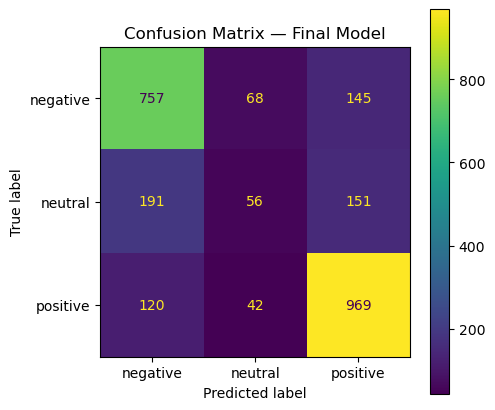

In [31]:
best_model = grid_svm if grid_svm.best_score_ >= grid_lr.best_score_ else grid_lr
final_pipe = best_model.best_estimator_

final_pipe.fit(X_train, y_train)
y_pred = final_pipe.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))
cm = confusion_matrix(y_test, y_pred, labels=["negative","neutral","positive"])
disp = ConfusionMatrixDisplay(cm, display_labels=["negative","neutral","positive"])
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax, values_format='d')
plt.title("Confusion Matrix — Final Model")
plt.show()


In [33]:
print("Applying text preprocessing...")

df_clean['cleaned_review'] = df_clean['Translated_Review'].apply(preprocess_text)

df_clean['processed_review'] = df_clean['cleaned_review'].apply(advanced_preprocess)

df_clean = df_clean[df_clean['processed_review'] != ''].copy()
print(f"Shape after removing empty processed reviews: {df_clean.shape}")

for i in range(3):
    if i < len(df_clean):
        print(f"Original: {df_clean.iloc[i]['Translated_Review'][:100]}...")
        print(f"Cleaned:  {df_clean.iloc[i]['cleaned_review'][:100]}...")
        print(f"Processed: {df_clean.iloc[i]['processed_review'][:100]}...")
        print("-" * 80)

Applying text preprocessing...


NameError: name 'df_clean' is not defined